<font size="5">**Exploratory Data Analysis on Netflix Dataset using Python**</font>


-- The Dataset is about Daily-updated of the Netflix Movies & TV Series Dataset.

-- This dataset provides a comprehensive collection of all Movies and TV Series available on Netflix.

-- In addition to basic information, it includes IMDb-specific data like IMDb ID, Average Rating, and Number of Votes.

-- This dataset have 8 Columns and 21316 Rows.

__Column Heads:__

-- __title__: The name of the movie or TV series.

-- __type__: Specifies whether the title is a movie or a TV series.

-- __genres__: The genre or genres associated with the title, such as drama, comedy,thriller, etc.

-- __release year__: The year in which the title was released.

-- __imdbID__: A unique identifier for the title on IMDb, which can be used to cross-reference or gather additional data from IMDb.

-- __imdbAverageRating__: The average user rating for the title on IMDb, providing insight into its popularity or quality.

-- __imdbNumVotes__: The total number of votes the title has received on IMDb, indicating how widely viewed or rated the title is.

-- __availableCountries__: The countries where the title is available for streaming on Netflix.

* __TARGET VARIABLE in this Dtaset is imdbAverageRating__

<font size="5">**Importing Libraries**</font>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder 
le=LabelEncoder()


ModuleNotFoundError: No module named 'numpy'

<font size="5">**Loading Dataset**</font>


In [4]:
df=pd.read_csv(r"C:\Users\ACER\Documents\data.csv")

In [5]:
df

,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes,availableCountries
0,Ariel,movie,"Comedy, Crime, Romance",1988.0,tt0094675,7.4,9085.0,NaN
1,Shadows in Paradise,movie,"Comedy, Drama, Music",1986.0,tt0092149,7.4,7891.0,NaN
2,Forrest Gump,movie,"Drama, Romance",1994.0,tt0109830,8.8,2366436.0,NaN
3,American Beauty,movie,Drama,1999.0,tt0169547,8.3,1245311.0,NaN
4,The Fifth Element,movie,"Action, Adventure, Sci-Fi",1997.0,tt0119116,7.6,524987.0,NaN
...,...,...,...,...,...,...,...,...
21311,NaN,tv,NaN,NaN,NaN,NaN,NaN,NaN
21312,NaN,tv,NaN,2020.0,NaN,NaN,NaN,NaN
21313,Inhuman Resources,tv,"Comedy, Horror",2022.0,tt23786902,NaN,NaN,NaN
21314,Malam Bertemu Subuh,tv,"Drama, Romance",2023.0,tt28628460,NaN,NaN,NaN


<font size="5">**Understanding Dataset**</font>


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21316 entries, 0 to 21315
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               20603 non-null  object 
 1   type                21316 non-null  object 
 2   genres              20944 non-null  object 
 3   releaseYear         21275 non-null  float64
 4   imdbId              19713 non-null  object 
 5   imdbAverageRating   19522 non-null  float64
 6   imdbNumVotes        19522 non-null  float64
 7   availableCountries  161 non-null    object 
dtypes: float64(3), object(5)
memory usage: 1.3+ MB


In [7]:
df.isnull().sum()

title                   713
type                      0
genres                  372
releaseYear              41
imdbId                 1603
imdbAverageRating      1794
imdbNumVotes           1794
availableCountries    21155
dtype: int64

* Column title have 713 null values.And the data type is object.
* Column type have no null values.And the data type is object.
* Column genres have 372 null values.And the data type is object.
* Column releaseYear have 41 null values.And the data type is float64.
* Column imdbId have 1603 null values.And the data type is object.
* Column imdbAverageRating have 1794 null values.And the data type is float64.
* Column imdbNumVotes have 1794 null values.And the data type is float64.
* Column availableCountries have 21155 null values.And the data type is object.

In [8]:
df.isnull().sum().sum()

27472

In [9]:
#total number of rows and column in dataset
df.shape

(21316, 8)

In [10]:
#check total no of duplicates
df.duplicated().sum()

404

In [11]:
#check title has any duplicates
df['title'].value_counts()

title
Animal                                                                        5
Wolf                                                                          5
Perfect Strangers                                                             5
The Courier                                                                   5
Monster                                                                       5
                                                                             ..
Crayon Shin-chan Movie 23: Ora No Hikkoshi Monogatari - Saboten Daisuugeki    1
Dügün Dernek 2: Sünnet                                                        1
Mike Epps: Don't Take It Personal                                             1
Kiki, Love to Love                                                            1
De rockstar à tueur: le cas Cantat                                            1
Name: count, Length: 19785, dtype: int64

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
releaseYear,21275.0,2013.320376,14.301745,1913.0,2012.0,2018.0,2022.00,2025.0
imdbAverageRating,19522.0,6.401404,1.093753,1.2,5.7,6.5,7.20,9.8
imdbNumVotes,19522.0,31674.772308,120814.995033,5.0,328.0,1593.5,10136.25,3027976.0


# Data Cleaning

In [13]:
# Coping df into df1
df1=df.copy()

In [14]:
# Dropping duplicates
df.drop_duplicates(inplace=True)

In [15]:
# checking is there any duplicate after removing duplicates
df.duplicated().sum()

0

In [16]:
# chacking is there any null values after removing duplicates
df.isnull().sum()

title                   310
type                      0
genres                  210
releaseYear              17
imdbId                 1200
imdbAverageRating      1391
imdbNumVotes           1391
availableCountries    20751
dtype: int64

In [17]:
df['imdbAverageRating'].isnull().sum()

1391

In [18]:
# Dropping rows where target variable (imdbAverageRating) have null value
df=df.dropna(subset=['imdbAverageRating'])

In [19]:
print(df.isnull().sum())

title                     0
type                      0
genres                    1
releaseYear               0
imdbId                    0
imdbAverageRating         0
imdbNumVotes              0
availableCountries    19411
dtype: int64


In [20]:
df.duplicated().sum()

0

# Droping

In [21]:
# Dropping column availableCountries
# Since this feature is not proper and confusing so willl drop the column availableCountries
df=df.drop('availableCountries',axis=1)

In [22]:
df

,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes
0,Ariel,movie,"Comedy, Crime, Romance",1988.0,tt0094675,7.4,9085.0
1,Shadows in Paradise,movie,"Comedy, Drama, Music",1986.0,tt0092149,7.4,7891.0
2,Forrest Gump,movie,"Drama, Romance",1994.0,tt0109830,8.8,2366436.0
3,American Beauty,movie,Drama,1999.0,tt0169547,8.3,1245311.0
4,The Fifth Element,movie,"Action, Adventure, Sci-Fi",1997.0,tt0119116,7.6,524987.0
...,...,...,...,...,...,...,...
21299,Gold & Greed: The Hunt for Fenn's Treasure,tv,Documentary,2025.0,tt15789898,7.1,438.0
21303,Culture Shock,tv,"Comedy, Drama, Romance",2025.0,tt35913832,7.8,12.0
21306,Go!,tv,"Drama, Sport, Thriller",2025.0,tt27505053,6.7,81.0
21307,Bleach: Thousand-Year Blood War,tv,"Action, Adventure, Animation",2022.0,tt14986406,9.0,59578.0


In [23]:
#drop column 'imdbId'
df=df.drop('imdbId',axis=1)

In [24]:
df

,title,type,genres,releaseYear,imdbAverageRating,imdbNumVotes
0,Ariel,movie,"Comedy, Crime, Romance",1988.0,7.4,9085.0
1,Shadows in Paradise,movie,"Comedy, Drama, Music",1986.0,7.4,7891.0
2,Forrest Gump,movie,"Drama, Romance",1994.0,8.8,2366436.0
3,American Beauty,movie,Drama,1999.0,8.3,1245311.0
4,The Fifth Element,movie,"Action, Adventure, Sci-Fi",1997.0,7.6,524987.0
...,...,...,...,...,...,...
21299,Gold & Greed: The Hunt for Fenn's Treasure,tv,Documentary,2025.0,7.1,438.0
21303,Culture Shock,tv,"Comedy, Drama, Romance",2025.0,7.8,12.0
21306,Go!,tv,"Drama, Sport, Thriller",2025.0,6.7,81.0
21307,Bleach: Thousand-Year Blood War,tv,"Action, Adventure, Animation",2022.0,9.0,59578.0


In [25]:
# Changing dtype of 'releaseYear' from float into int
df['releaseYear']=df['releaseYear'].astype('int64')

In [26]:
df

,title,type,genres,releaseYear,imdbAverageRating,imdbNumVotes
0,Ariel,movie,"Comedy, Crime, Romance",1988,7.4,9085.0
1,Shadows in Paradise,movie,"Comedy, Drama, Music",1986,7.4,7891.0
2,Forrest Gump,movie,"Drama, Romance",1994,8.8,2366436.0
3,American Beauty,movie,Drama,1999,8.3,1245311.0
4,The Fifth Element,movie,"Action, Adventure, Sci-Fi",1997,7.6,524987.0
...,...,...,...,...,...,...
21299,Gold & Greed: The Hunt for Fenn's Treasure,tv,Documentary,2025,7.1,438.0
21303,Culture Shock,tv,"Comedy, Drama, Romance",2025,7.8,12.0
21306,Go!,tv,"Drama, Sport, Thriller",2025,6.7,81.0
21307,Bleach: Thousand-Year Blood War,tv,"Action, Adventure, Animation",2022,9.0,59578.0


In [27]:
# Change datatype of 'imdbNumVotes' from float to int
df['imdbNumVotes']=df['imdbNumVotes'].astype('int64')

In [28]:
df

,title,type,genres,releaseYear,imdbAverageRating,imdbNumVotes
0,Ariel,movie,"Comedy, Crime, Romance",1988,7.4,9085
1,Shadows in Paradise,movie,"Comedy, Drama, Music",1986,7.4,7891
2,Forrest Gump,movie,"Drama, Romance",1994,8.8,2366436
3,American Beauty,movie,Drama,1999,8.3,1245311
4,The Fifth Element,movie,"Action, Adventure, Sci-Fi",1997,7.6,524987
...,...,...,...,...,...,...
21299,Gold & Greed: The Hunt for Fenn's Treasure,tv,Documentary,2025,7.1,438
21303,Culture Shock,tv,"Comedy, Drama, Romance",2025,7.8,12
21306,Go!,tv,"Drama, Sport, Thriller",2025,6.7,81
21307,Bleach: Thousand-Year Blood War,tv,"Action, Adventure, Animation",2022,9.0,59578


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19521 entries, 0 to 21315
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              19521 non-null  object 
 1   type               19521 non-null  object 
 2   genres             19520 non-null  object 
 3   releaseYear        19521 non-null  int64  
 4   imdbAverageRating  19521 non-null  float64
 5   imdbNumVotes       19521 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 1.0+ MB


# Feature Engineering

In [30]:
# Creating new column named  perfomance_of_movies
df['performance_of_movies']=df['imdbAverageRating']
df

,title,type,genres,releaseYear,imdbAverageRating,imdbNumVotes,performance_of_movies
0,Ariel,movie,"Comedy, Crime, Romance",1988,7.4,9085,7.4
1,Shadows in Paradise,movie,"Comedy, Drama, Music",1986,7.4,7891,7.4
2,Forrest Gump,movie,"Drama, Romance",1994,8.8,2366436,8.8
3,American Beauty,movie,Drama,1999,8.3,1245311,8.3
4,The Fifth Element,movie,"Action, Adventure, Sci-Fi",1997,7.6,524987,7.6
...,...,...,...,...,...,...,...
21299,Gold & Greed: The Hunt for Fenn's Treasure,tv,Documentary,2025,7.1,438,7.1
21303,Culture Shock,tv,"Comedy, Drama, Romance",2025,7.8,12,7.8
21306,Go!,tv,"Drama, Sport, Thriller",2025,6.7,81,6.7
21307,Bleach: Thousand-Year Blood War,tv,"Action, Adventure, Animation",2022,9.0,59578,9.0


In [31]:
#Handle null values 
def movies_perf(x):
    if not pd.isna(x):    #check if x is not NAN
        if x > 8.5:
            return 'super hit'
        elif 7.5 < x <= 8.5:
            return 'hit'
        elif 6.5 < x <= 7.5:
            return 'average'
        else:
            return 'below average'
    else:
        return 'not rated'

df['performance_of_movies']=df['imdbAverageRating'].apply(movies_perf)

In [32]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,21292,21293,21294,21295,21297,21299,21303,21306,21307,21315
title,Ariel,Shadows in Paradise,Forrest Gump,American Beauty,The Fifth Element,Jarhead,Unforgiven,Eternal Sunshine of the Spotless Mind,Amores Perros,A History of Violence,...,Medusa,Sindikat-2,Welcome to the Family,Million Dollar Secret,Temptation Island,Gold & Greed: The Hunt for Fenn's Treasure,Culture Shock,Go!,Bleach: Thousand-Year Blood War,De rockstar à tueur: le cas Cantat
type,movie,movie,movie,movie,movie,movie,movie,movie,movie,movie,...,tv,tv,tv,tv,tv,tv,tv,tv,tv,tv
genres,"Comedy, Crime, Romance","Comedy, Drama, Music","Drama, Romance",Drama,"Action, Adventure, Sci-Fi","Biography, Drama, War","Drama, Western","Drama, Romance, Sci-Fi","Drama, Thriller","Action, Crime, Drama",...,"Drama, Thriller","Action, Crime, History","Comedy, Crime, Drama","Game-Show, Reality-TV","Game-Show, Reality-TV, Romance",Documentary,"Comedy, Drama, Romance","Drama, Sport, Thriller","Action, Adventure, Animation",Documentary
releaseYear,1988,1986,1994,1999,1997,2005,1992,2004,2000,2005,...,2025,1981,2025,2025,2025,2025,2025,2025,2022,2025
imdbAverageRating,7.4,7.4,8.8,8.3,7.6,7.0,8.2,8.3,8.0,7.4,...,5.1,7.3,5.6,7.5,6.7,7.1,7.8,6.7,9.0,7.2
imdbNumVotes,9085,7891,2366436,1245311,524987,214867,452521,1131343,263514,263381,...,1021,81,196,297,151,438,12,81,59578,15
performance_of_movies,average,average,super hit,hit,hit,average,hit,hit,hit,average,...,below average,average,below average,average,average,average,hit,average,super hit,average


# Data Visualization

<Axes: xlabel='imdbAverageRating', ylabel='Count'>

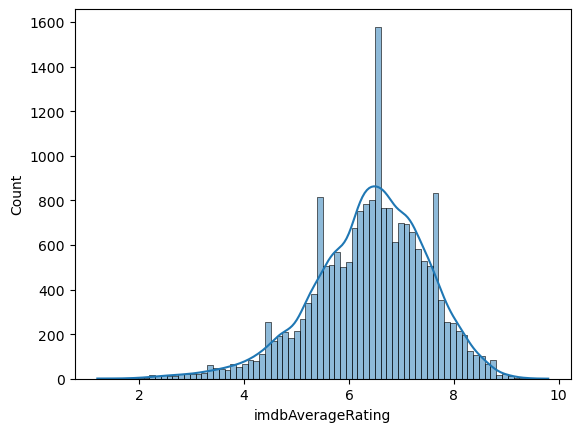

In [33]:
sns.histplot(df['imdbAverageRating'], kde=True)

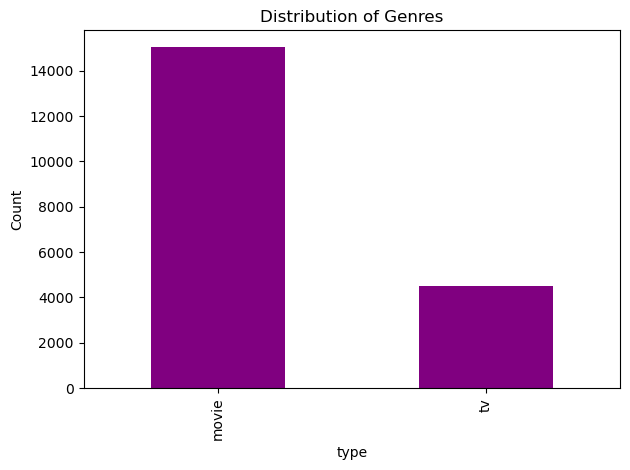

In [36]:
df['type'].value_counts().plot(kind='bar', color='purple')
plt.title('Distribution of Genres')
plt.xlabel('type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


In [43]:
df = df.sort_values(by='imdbNumVotes', ascending=False)
df


,title,type,genres,releaseYear,imdbAverageRating,imdbNumVotes,performance_of_movies
77,The Shawshank Redemption,movie,Drama,1994,9.3,3027976,super hit
52,The Dark Knight,movie,"Action, Crime, Drama",2008,9.0,3004243,super hit
1757,Inception,movie,"Action, Adventure, Sci-Fi",2010,8.8,2668957,super hit
2,Forrest Gump,movie,"Drama, Romance",1994,8.8,2366436,super hit
4721,Interstellar,movie,"Adventure, Drama, Sci-Fi",2014,8.7,2324584,super hit
...,...,...,...,...,...,...,...
18720,Canta Comigo Teen,tv,Reality-TV,2020,7.8,5,hit
12793,"Snipp, snapp, snut",movie,"Animation, Short",2016,6.4,5,below average
11064,The G Word,movie,"Comedy, Short",2016,5.0,5,below average
13258,Ghost blows out the light 2,movie,Action,2020,8.4,5,hit


<Axes: xlabel='imdbNumVotes', ylabel='imdbAverageRating'>

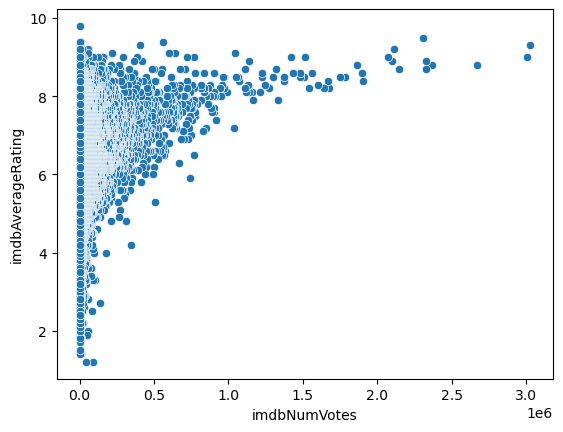

In [44]:
#scatterplot x-axis=imdb_avgrating_from_0_to_10  y-axis=imdb_numvotes_from_0_to_30(in lakhs)
sns.scatterplot(x='imdbNumVotes', y='imdbAverageRating', data=df)

In [64]:
df['performance_of_movies'].value_counts()


performance_of_movies
below average    10268
average           6604
hit               2437
super hit          212
Name: count, dtype: int64

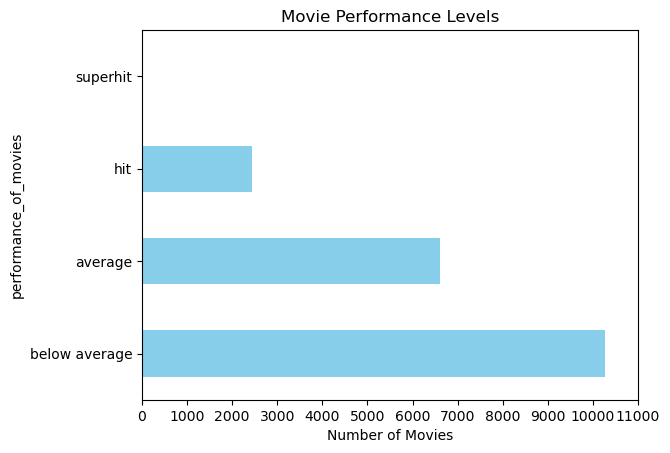

In [63]:
order = ['below average', 'average', 'hit', 'superhit']
counts = df['performance_of_movies'].value_counts().reindex(order)

counts.plot(kind='barh', color='skyblue', title='Movie Performance Levels')
plt.xlabel('Number of Movies')
plt.xticks(ticks=range(0, int(counts.max()) + 1000, 1000))  # Set gap of 1000
plt.show()


<Axes: xlabel='releaseYear', ylabel='Count'>

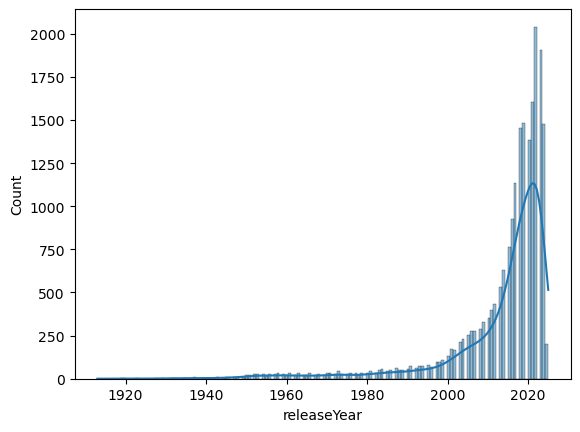

In [53]:
sns.histplot(df1['releaseYear'], kde=True)

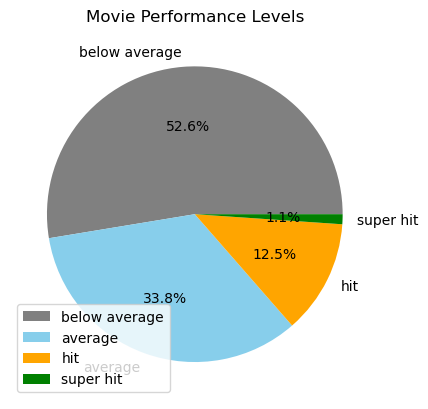

In [73]:
# Define order
order = ['below average', 'average', 'hit', 'super hit']

# Get counts in order
counts = df['performance_of_movies'].value_counts().reindex(order)

# Plot single clean pie chart
plt.pie(counts, labels=order, autopct='%1.1f%%', colors=['grey', 'skyblue', 'orange', 'green'])
plt.title('Movie Performance Levels')
plt.legend(order)
plt.show()


* In the column 'performance_of_movies' 1.1% of (superhit) & 12.5% of (hit) & 33.8% of (average) & 52.6% of (below Avg)

In [83]:
df['type'].unique()

array(['movie', 'tv'], dtype=object)

# Encoding

In [85]:
#Encode the column 'type' with replace method.
# Column type has only 2 unique values
# so use replace method for encoding
df['type'].replace(['movie','tv'],[0,1],inplace=True)
df

,title,type,genres,releaseYear,imdbAverageRating,imdbNumVotes,performance_of_movies
77,The Shawshank Redemption,0,Drama,1994,9.3,3027976,super hit
52,The Dark Knight,0,"Action, Crime, Drama",2008,9.0,3004243,super hit
1757,Inception,0,"Action, Adventure, Sci-Fi",2010,8.8,2668957,super hit
2,Forrest Gump,0,"Drama, Romance",1994,8.8,2366436,super hit
4721,Interstellar,0,"Adventure, Drama, Sci-Fi",2014,8.7,2324584,super hit
...,...,...,...,...,...,...,...
18720,Canta Comigo Teen,1,Reality-TV,2020,7.8,5,hit
12793,"Snipp, snapp, snut",0,"Animation, Short",2016,6.4,5,below average
11064,The G Word,0,"Comedy, Short",2016,5.0,5,below average
13258,Ghost blows out the light 2,0,Action,2020,8.4,5,hit


In [87]:
# Encoding columns title and genres with label encoding
df['title']=le.fit_transform(df['title'])
df['genres']=le.fit_transform(df['genres'])
df['performance_of_movies']=le.fit_transform(df['performance_of_movies'])
df

,title,type,genres,releaseYear,imdbAverageRating,imdbNumVotes,performance_of_movies
77,16430,0,484,1994,9.3,3027976,3
52,14851,0,52,2008,9.0,3004243,3
1757,7063,0,16,2010,8.8,2668957,3
2,5313,0,543,1994,8.8,2366436,3
4721,7154,0,161,2014,8.7,2324584,3
...,...,...,...,...,...,...,...
18720,2682,1,654,2020,7.8,5,2
12793,13342,0,253,2016,6.4,5,1
11064,15154,0,390,2016,5.0,5,1
13258,5634,0,0,2020,8.4,5,2


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19521 entries, 77 to 12488
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  19521 non-null  int32  
 1   type                   19521 non-null  int64  
 2   genres                 19521 non-null  int32  
 3   releaseYear            19521 non-null  int64  
 4   imdbAverageRating      19521 non-null  float64
 5   imdbNumVotes           19521 non-null  int64  
 6   performance_of_movies  19521 non-null  int32  
dtypes: float64(1), int32(3), int64(3)
memory usage: 991.3 KB


# Correlation Analysis

In [90]:
c=df.corr()
c

,title,type,genres,releaseYear,imdbAverageRating,imdbNumVotes,performance_of_movies
title,1.000000,0.008645,0.006236,-0.031624,0.015161,0.022876,-0.012611
type,0.008645,1.000000,0.010864,0.205887,0.321567,-0.068610,0.119632
genres,0.006236,0.010864,1.000000,0.004937,-0.013682,-0.096323,-0.015131
releaseYear,-0.031624,0.205887,0.004937,1.000000,-0.027128,-0.069311,0.006249
imdbAverageRating,0.015161,0.321567,-0.013682,-0.027128,1.000000,0.205223,0.046138
imdbNumVotes,0.022876,-0.068610,-0.096323,-0.069311,0.205223,1.000000,0.142526
performance_of_movies,-0.012611,0.119632,-0.015131,0.006249,0.046138,0.142526,1.000000


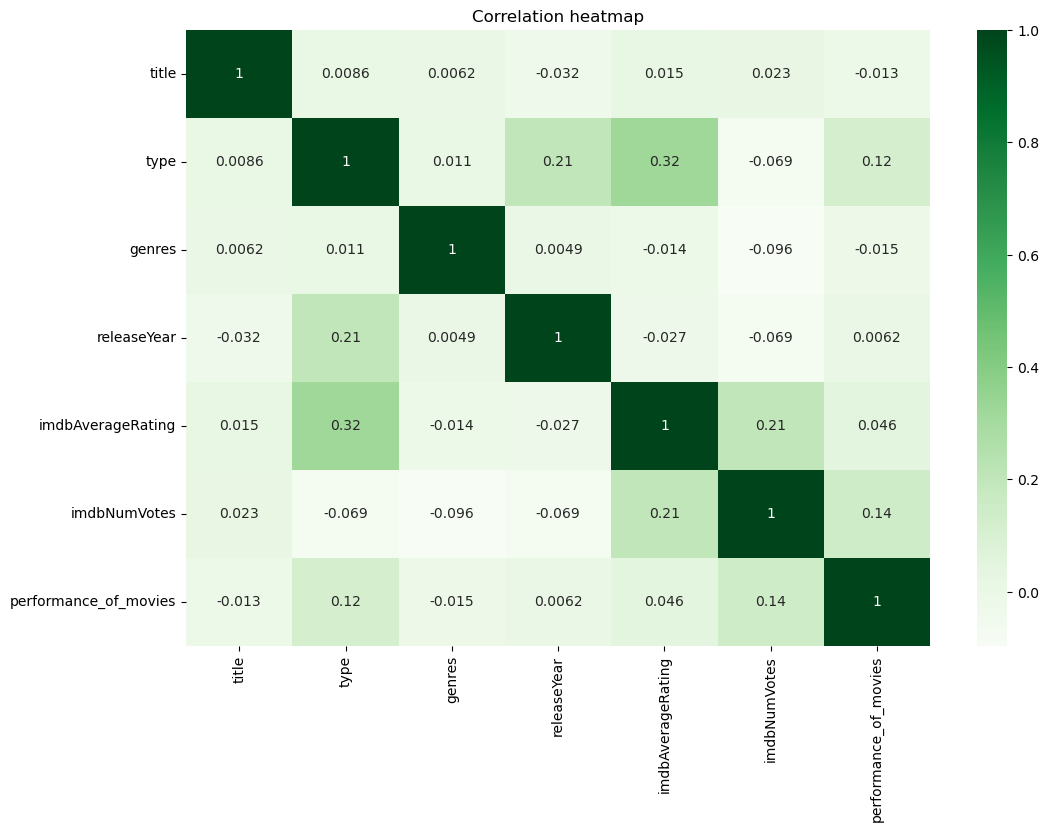

In [92]:
plt.figure(figsize=(12,8))
sns.heatmap(c,annot=True,cmap='Greens')
plt.title('Correlation heatmap')
plt.show()

**Documentation and Reporting**


## Netflix Movies & TV Series Project Report
**1.Libraries:**
- import required Libraries.

**2. Problem Statement:**
- This dataset provides a comprehensive collection of all Movies and TV Series available on Netflix.
The primary objective is to build a model that accurately predicts the imdbAverageRating of a Movies or TV Series based on its features.

**3. Data Understanding:**
- The dataset has 21316 rows and 8 columns.
- Features include: title , type    , genres    , releaseYear   , imdbId ,  imdbAverageRating   , imdbNumVotes and availableCountries.
- Target Variable: imdbAverageRating.

**4. Data Cleaning:**
- 404 duplicated rows where found.
- duplicated rows removed.
- Missing values were found in 'title' , 'genres' , 'releaseYear' , 'imdbId' , 'imdbAverageRating' and 'imdbNumVotes' columns.
- Missing values were handled by droping rows where have null values.
- Droped the column availableCountries.
- Droped the column imdbId.
- Changed dtype of releaseYear and imdbNumVotes from float into int.

**5.Feature Engineering:**
- Created new column named 'perfomance_of_movies'.

**6. Data Visualization:**
- Histogram were created for entire dataset to understand their distribution.
- Histograms were created for imdbAverageRating, imdbNumVotes and releaseYear to understand their distributions.
- Pie chart created for type & perfomance_of_movies to understand their percent for each value.
- Skewness of imdbNumVotes handled using log1p method.

**7. Encoding:**
- Encode the column type with replace method.
- Encode columns title , genres & perfomance_of_movies with label encoding.

**8. Correlation Analysis:**
- Correlation Analysis: a heatmap of the correlation matrix revealed the relationships between the variables.



# Thank You!